# Apple Leaf Disease Detection Project

In [2]:
import os

# # Mount Google Drive
# drive.mount('/content/drive')
# Paths to your dataset folders in Google Drive

# Define the base directory
base_dir = './dataset/'

# Define subdirectories
train_path = os.path.join(base_dir, 'train')
validation_path = os.path.join(base_dir, 'val')
test_path = os.path.join(base_dir, 'test')

In [3]:
# Function to recursively delete .DS_Store files that are created by macOS
def delete_ds_store_files(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename == '.DS_Store':
                file_path = os.path.join(root, filename)
                os.remove(file_path)

# Call the function to delete .DS_Store files
delete_ds_store_files(base_dir)

In [4]:
## Checking the folder if it exist
import os
if os.path.exists(train_path):
    print("Contents of the train_path folder:")
    for item in os.listdir(train_path):
        print(item)
else:
    print("The specified path does not exist. Please check the path.")

Contents of the train_path folder:
apple_scab
healthy
apple_black_rot
cedar_apple_rust


In [5]:
# Import
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 949 images belonging to 4 classes.
Found 210 images belonging to 4 classes.
Found 211 images belonging to 4 classes.


### Building CNN Model (128, 128, 3)

In [6]:
## Import libs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [7]:
# Define the model
model = Sequential()

# Convolutional layer and maxpool layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))

# Convolutional layer and maxpool layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convolutional layer and maxpool layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convolutional layer and maxpool layer 4
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# This layer flattens the resulting image array to 1D array
model.add(Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function
model.add(Dense(512, activation='relu'))

# Output layer with single neuron which gives 0 for one category and 1 for another
# Use 'softmax' activation function for multi-class classification
model.add(Dense(4, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


2024-01-22 18:11:42.614440: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-22 18:11:42.614942: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-22 18:11:42.615429: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-22 18:11:42.616660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-22 18:11:42.617066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

### Train the Model

In [8]:
from math import ceil

# Calculating steps
steps_per_epoch = ceil(211 / 32)  # For training generator
validation_steps = ceil(949 / 32)  # For validation generator
test_steps = ceil(210 / 32)  # For test generator

# Define the number of training epochs
epochs = 30  # Adjust based on your observation of the training process

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Save the trained model
model.save('./apple_leaf_disease_model.keras')

Epoch 1/30


2024-01-22 18:11:43.599531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-01-22 18:11:43.662689: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


7/7 [==============================] - ETA: 0s - loss: 1.3725 - accuracy: 0.4330WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 30 batches). You may need to use the repeat() function when building your dataset.


2024-01-22 18:11:45.552279: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3782772458069156873
2024-01-22 18:11:45.552300: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11156148700591093689
2024-01-22 18:11:45.552310: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2146168177720324296
2024-01-22 18:11:45.552317: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13698305074380175738
2024-01-22 18:11:45.552321: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12676538206822082014


7/7 [==============================] - 2s 182ms/step - loss: 1.3725 - accuracy: 0.4330 - val_loss: 1.3793 - val_accuracy: 0.3762
Epoch 2/30
7/7 [==============================] - 1s 76ms/step - loss: 1.2648 - accuracy: 0.4286
Epoch 3/30
7/7 [==============================] - 1s 80ms/step - loss: 1.1774 - accuracy: 0.5000
Epoch 4/30
7/7 [==============================] - 1s 69ms/step - loss: 1.0826 - accuracy: 0.5402
Epoch 5/30
7/7 [==============================] - 1s 70ms/step - loss: 0.8417 - accuracy: 0.6607
Epoch 6/30
7/7 [==============================] - 1s 69ms/step - loss: 0.7246 - accuracy: 0.7054
Epoch 7/30
7/7 [==============================] - 1s 75ms/step - loss: 0.7976 - accuracy: 0.6830
Epoch 8/30
7/7 [==============================] - 1s 83ms/step - loss: 0.8867 - accuracy: 0.6384
Epoch 9/30
7/7 [==============================] - 1s 100ms/step - loss: 0.7662 - accuracy: 0.7009
Epoch 10/30
7/7 [==============================] - 1s 83ms/step - loss: 0.6995 - accuracy: 0.7

In [9]:
# Optionally, evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
test_loss, test_accuracy


7/7 [==============================] - 0s 34ms/step - loss: 0.7701 - accuracy: 0.7488


(0.7700546979904175, 0.7488151788711548)

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('./apple_leaf_disease_model.keras')

# Path to your test image
image_path = './test-images/as.JPG'

# Load and preprocess the test image
test_image = load_img(image_path, target_size=(128, 128))  # Resize the image for modelling
test_image = img_to_array(test_image)  # Convert the image to numpy array
test_image = test_image / 255.0  # Normalize the image
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction, axis=1)

# Class names mapping
class_names = ['Apple Black Rot', 'Apple Scab', 'Cedar Apple Rust', 'Healthy Apple']

# Print the predicted class name
print("Predicted class:", class_names[predicted_class_index[0]])


1/1 [==============================] - 0s 77ms/step
Predicted class: Apple Scab


30/30 [==============================] - 2s 68ms/step


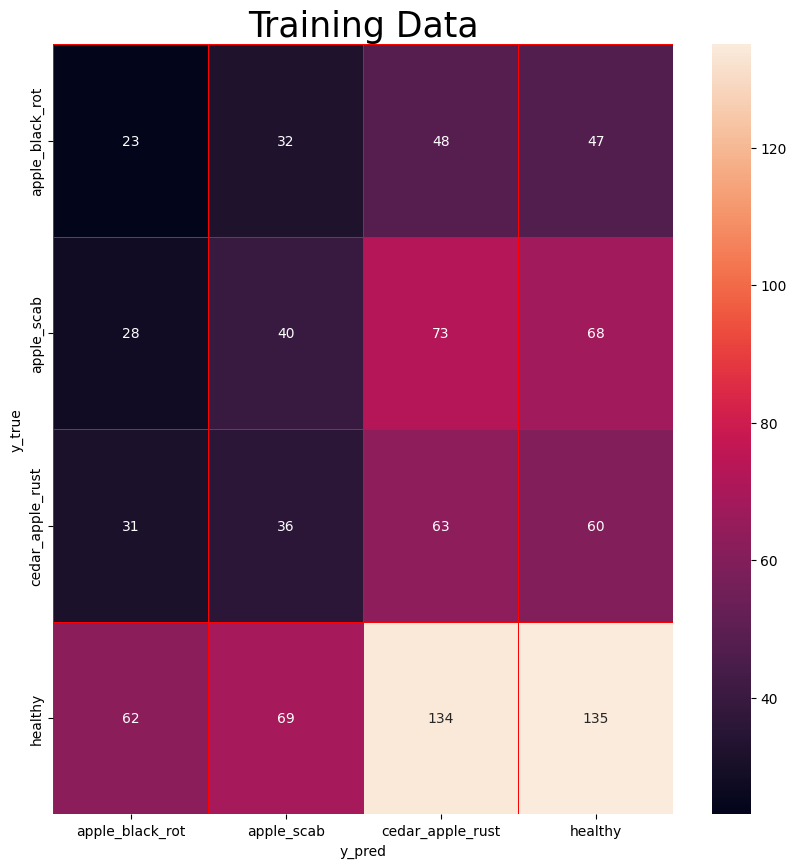

7/7 [==============================] - 0s 30ms/step


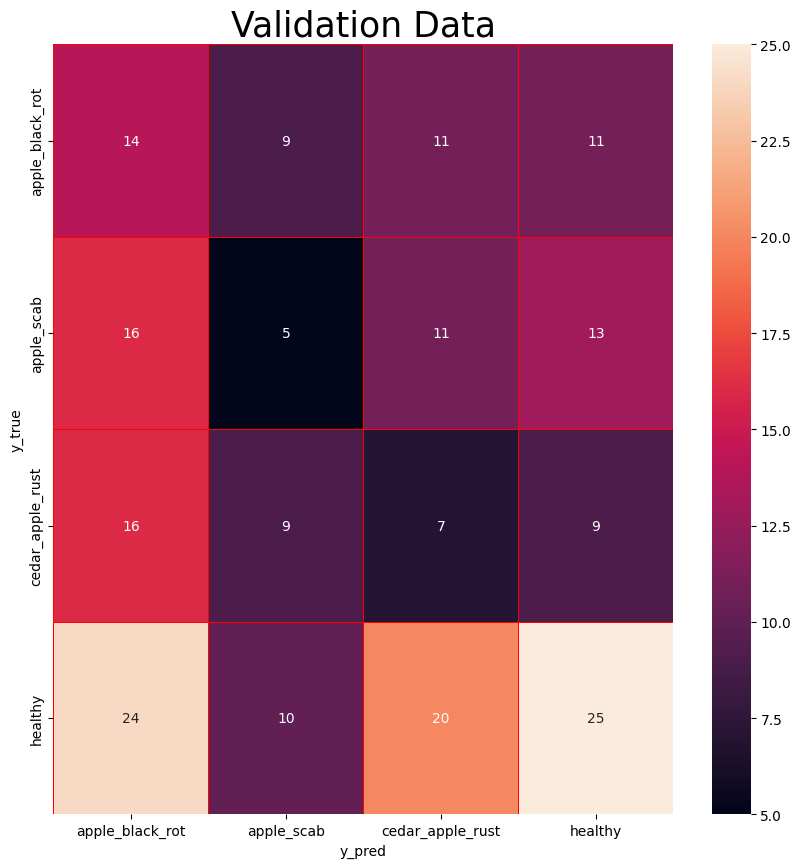

7/7 [==============================] - 0s 26ms/step


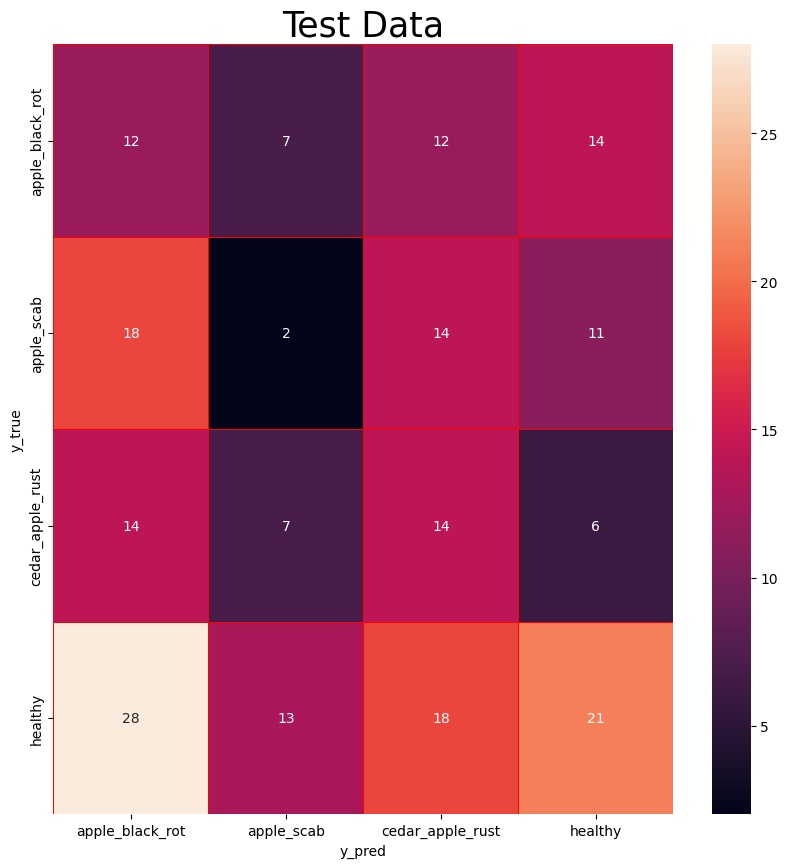

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def confusion(model, data_generator, X):
    # Generate predictions using the model and data generator
    y_pred = model.predict(data_generator)
    
    # Get true labels
    true_labels = data_generator.classes
    
    # Get class labels from the data generator
    class_labels = list(data_generator.class_indices.keys())

    # Create a confusion matrix
    cm = confusion_matrix(true_labels, np.argmax(y_pred, axis=1))
    
    # Plot the confusion matrix
    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(cm, annot=True, linewidth=.5, linecolor="r", fmt=".0f", ax=ax)

    plt.title(X, size=25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")

    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)
    plt.show()

# Confusion matrix for training data
confusion(model, train_generator, "Training Data")

# Confusion matrix for validation data
confusion(model, validation_generator, "Validation Data")

# Confusion matrix for test data
confusion(model, test_generator, "Test Data")


In [12]:
# from sklearn.metrics import classification_report

# # Define a function to generate and print the classification report
# def generate_classification_report(model, data_generator, generator_name):
#     # Generate predictions using the model and data generator
#     y_pred_categorical = model.predict(data_generator)

#     # Convert categorical predictions to class labels
#     predicted_labels = np.argmax(y_pred_categorical, axis=1)

#     # Get true labels from the data generator
#     true_labels = data_generator.classes

#     # Get class labels from the data generator
#     class_labels = list(data_generator.class_indices.keys())

#     # Generate and print the classification report
#     report = classification_report(true_labels, predicted_labels, target_names=class_labels)
#     print(f"Classification Report for {generator_name}:\n")
#     print(report)

# # Generate classification reports for train, validation, and test data
# generate_classification_report(model, train_generator, "Train Generator")
# generate_classification_report(model, validation_generator, "Validation Generator")
# generate_classification_report(model, test_generator, "Test Generator")
